In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

##  1. Read CSV and choose the index column

In [2]:
# the index column is column -1, not column 0.
ms = pd.read_csv('C:/Users/YI/Desktop/Coursera/Python Statistics Finance/microsoft.csv',index_col ='Date') # index is date
print(ms.iloc[[0,2],[0,1]])                                                                                
print(ms.head())
ms_index = pd.read_csv('C:/Users/YI/Desktop/Coursera/Python Statistics Finance/microsoft.csv')   # index is num
#print(ms_index.iloc[[0,2,4], :]) 
print(ms_index.iloc[[0,2],[0,1]]) 
print(ms_index.head())

                 Open       High
Date                            
2014-12-31  46.730000  47.439999
2015-01-05  46.369999  46.730000
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2014-12-31  46.730000  47.439999  46.450001  46.450001  42.848763  21552500
2015-01-02  46.660000  47.419998  46.540001  46.759998  43.134731  27913900
2015-01-05  46.369999  46.730000  46.250000  46.330002  42.738068  39673900
2015-01-06  46.380001  46.750000  45.540001  45.650002  42.110783  36447900
2015-01-07  45.980000  46.459999  45.490002  46.230000  42.645817  29114100
         Date       Open
0  2014-12-31  46.730000
2  2015-01-05  46.369999
         Date       Open       High        Low      Close  Adj Close    Volume
0  2014-12-31  46.730000  47.439999  46.450001  46.450001  42.848763  21552500
1  2015-01-02  46.660000  47.419998  46.540001  46.759998  43.134731  27913900
2  2015-01-05  46.369999

## 2. Create a new column in the DataFrame 

In [3]:
#Your turn to create PriceDiff in the DataFrame ms
ms['PriceDiff'] = ms['Close'].shift(-1) - ms['Close']                              # add column by adding two other columns
ms['Return'] = ms['PriceDiff'] /ms['Close']
ms['Direction-1'] = [1 if x >= 0 else 0 for x in ms['PriceDiff']]                  # add column by conditional statements
ms['Direction-2'] = [1 if ms['PriceDiff'].loc[ei] > 0 else 0 for ei in ms.index ]
print('Price difference on {} is {}. direction is {}'.format('2015-01-05', ms['PriceDiff'].loc['2015-01-05'], ms['Direction-1'].loc['2015-01-05']))
ms.head()

Price difference on 2015-01-05 is -0.6799999999999997. direction is 0


,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction-1,Direction-2
Date,,,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.309997,0.006674,1,1
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.429996,-0.009196,0,0
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,-0.680000,-0.014677,0,0
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.579998,0.012705,1,1
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,1.360000,0.029418,1,1


## 3. Select Row/Column/Entry from DataFrame 

In [4]:
#Retieve a certain data element
#Run this code to display the price difference of Microsoft on 2015-01-05
print(ms.loc['2015-01-05'])                           # must ensure to set the Date as the index
print(ms.loc['2015-01-05','PriceDiff'])
print(ms.loc['2015-01-05']['PriceDiff'])
print(ms.loc['2016-01-01':'2016-12-31'])
print(ms['PriceDiff'].loc['2015-01-05'])              # df['column'].loc['row'],
# print(ms['2015-01-05'].loc['PriceDiff'])            # this is wrong, row and column cannot be swapped

#Run this code to display the Open of Microsoft on the second row
print(ms_index.loc[0][0:3])                                # this df's index is numbers
print(ms_index.loc[0,'Open'])
print(ms_index.loc[0]['Open'])
print(ms_index.iloc[0,0])

#Calling the columns
ms_index['Close'][0:3]                                     # do not need to use .loc[]

Open           4.637000e+01
High           4.673000e+01
Low            4.625000e+01
Close          4.633000e+01
Adj Close      4.273807e+01
Volume         3.967390e+07
PriceDiff     -6.800000e-01
Return        -1.467731e-02
Direction-1    0.000000e+00
Direction-2    0.000000e+00
Name: 2015-01-05, dtype: float64
-0.6799999999999997
-0.6799999999999997
-0.6799999999999997
Date    2014-12-31
Open         46.73
High         47.44
Name: 0, dtype: object
46.73
46.73
2014-12-31


0    46.450001
1    46.759998
2    46.330002
Name: Close, dtype: float64

## 4. Show summary statistics of a DataFrame

In [5]:
# print the shape of ms, 1 line
print(ms.shape)
# print summary statistics of Microsoft
print(ms.describe())

(780, 10)
             Open        High         Low       Close   Adj Close  \
count  780.000000  780.000000  780.000000  780.000000  780.000000   
mean    58.912308   59.372308   58.465000   58.945397   56.931553   
std     12.852040   12.868060   12.802831   12.830350   13.670080   
min     40.340000   40.740002   39.720001   40.290001   37.267815   
25%     47.894998   48.295000   47.535001   47.974998   44.792073   
50%     56.150002   56.640001   55.700001   56.209999   53.775458   
75%     67.892500   68.174997   67.447500   67.740000   66.565508   
max     95.139999   96.070000   93.720001   95.010002   94.565781   

             Volume   PriceDiff      Return  Direction-1  Direction-2  
count  7.800000e+02  779.000000  779.000000   780.000000   780.000000  
mean   2.978900e+07    0.053338    0.000921     0.529487     0.516667  
std    1.522319e+07    0.786659    0.014237     0.499450     0.500043  
min    7.425600e+06   -4.349998   -0.092533     0.000000     0.000000  
25%    2

## 5. Create a new column in the DataFrame using Rolling Window calculation (.rolling()) - Moving average

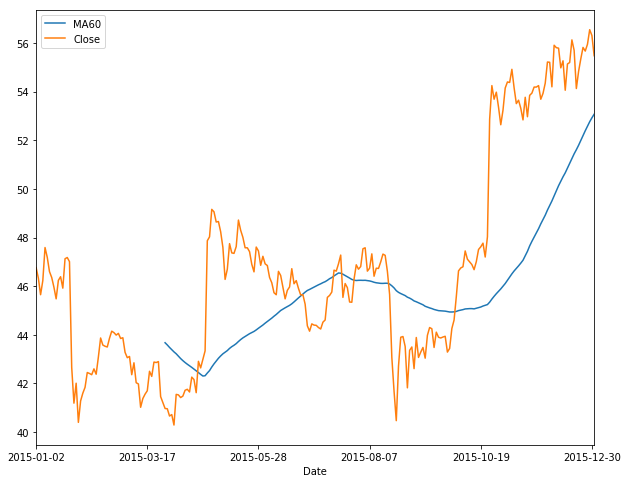

Date
2015-03-23          NaN
2015-03-24          NaN
2015-03-25          NaN
2015-03-26          NaN
2015-03-27    43.675000
2015-03-30    43.583500
2015-03-31    43.481833
2015-04-01    43.388333
2015-04-02    43.299000
2015-04-06    43.221000
Name: ma60, dtype: float64


In [6]:
# You can use .rolling() to calculate any numbers of days' Moving Average. This is your turn to calculate "60 days"
# moving average of Microsoft, rename it as "ma60". And follow the codes above in plotting a graph
ms['ma60'] = ms['Close'].rolling(60).mean()

#plot the moving average
plt.figure(figsize=(10, 8))
ms['ma60'].loc['2015-01-01':'2015-12-31'].plot(label='MA60')
ms['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()
print(ms['ma60'][55:65])

## 6. Plot the stock data using plot() method

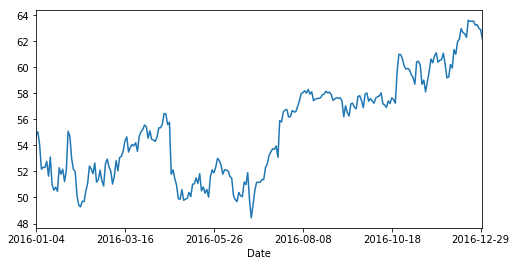

In [152]:
plt.figure(figsize=(8, 4))
# plot only the Close price of 2016 of Microsoft, 1 line 
ms_2016 = ms.loc['2016-01-01':'2016-12-31']
ms_2016['Close'].plot()
plt.show()

## 7. Build a simple trading strategy 

### 1. Munging the stock data and add two columns - MA10 and MA50

In [9]:
#import FB's stock data, add two columns - MA10 and MA50
#use dropna to remove any "Not a Number" data
ms000 = pd.read_csv('C:/Users/YI/Desktop/Coursera/Python Statistics Finance/microsoft.csv',index_col ='Date')
ms000['MA10'] = ms000['Close'].rolling(10).mean()
ms000['MA50'] = ms000['Close'].rolling(50).mean()
ms000 = ms000.dropna()
ms000.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,NaN,NaN
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,NaN,NaN
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,NaN,NaN
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,NaN,NaN
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,NaN,NaN


### 2. Add "Shares" column to make decisions base on the strategy 

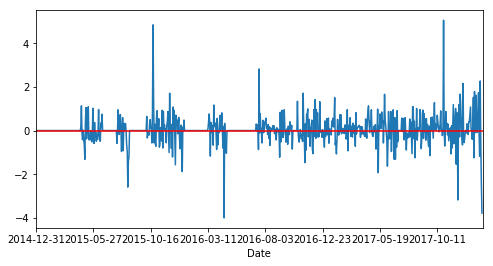

In [12]:
#Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)
ms000['Shares'] = [1 if ms000.loc[ei, 'MA10']>ms000.loc[ei, 'MA50'] else 0 for ei in ms000.index]

#Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as 
#the close price of tomorrow - the close price of today. Otherwise the profit is 0.
ms000['Close1'] = ms000['Close'].shift(-1)
ms000['Profit'] = [ms000.loc[ei, 'Close1'] - ms000.loc[ei, 'Close'] if ms000.loc[ei, 'Shares']==1 else 0 for ei in ms000.index]

# Plot the Profit and the 0 line
plt.figure(figsize=(8, 4))
ms000['Profit'].plot()
plt.axhline(y=0, color='red')

### 3. Use .cumsum() to display our model's performance if we follow the strategy 

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,91.862,86.5244,1,95.010002,2.270004,30.540009
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,92.349,86.7606,1,94.260002,-0.750000,29.790009
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,92.765,86.9978,1,91.779999,-2.480003,27.310006
2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,92.943,87.1828,1,88.000000,-3.779999,23.530007
2018-02-05,90.559998,93.239998,88.000000,88.000000,87.588554,51031500,92.582,87.2684,1,NaN,NaN,NaN


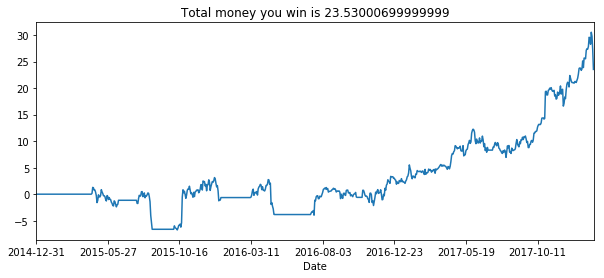

In [18]:
#Use .cumsum() to calculate the accumulated wealth over the period

ms000['wealth'] = ms000['Profit'].cumsum()  

#plot the wealth to show the growth of profit over the period
plt.figure(figsize=(10, 4))
ms000['wealth'].plot()
plt.title('Total money you win is {}'.format(ms000.loc[ms000.index[-2], 'wealth']))

ms000.head()
ms000.tail()